# Partial Report - Braille Text Translator

* Caio Augusto Duarte Basso - NUSP 10801173
* Gabriel Garcia Lorencetti - NUSP 10691891
* Leonardo Rossi Luiz - NUSP 10851691
* Witor Matheus Alves de Oliveira - NUSP 10692190

In [318]:
import numpy as np
import imageio 
import math
import matplotlib.pyplot as plt 

In [319]:
# realizando o realce da imagem de forma a deixa-la apenas com as cores preta para os simbolos e branca apra o fundo
def contrastEnhancement(img):
    
    imgAux = np.copy(img)
    #computando o histograma da imagem
    hist, bins = np.histogram(img, bins=int(np.max(img)-np.min(img)+1))

    indexMax = np.argmax(hist)

    # a intensidade que mais aparecer na imagem é considerada como o fundo e setamos para cor branca
    imgAux[np.where(imgAux == indexMax)] = 255
  
    hist[indexMax] = 0 # fazendo isso só para facilitar na hora de pegar a segunda intensidade mais frequente na imagem

    indexMax = np.argmax(hist)

    # a segunda intensidade que mais aparecer na imagem é considerada como cor responsavel pelos simbolos
    # e setamos para cor preta
    imgAux[np.where(imgAux == indexMax)] = 0


    # # se sobrar algo que nao seja considerado como fundo ou os pontos, colocamos para que seja englobado como fundo tambem
    imgAux[np.where( (imgAux < 255) & (imgAux > 0) )] = 0

    return imgAux.astype(np.uint8)

# Function for transforming RGB to gray scale
def rgb_to_gray(img):
        grayImage = np.zeros(img.shape)
        R = np.array(img[:, :, 0])
        G = np.array(img[:, :, 1])
        B = np.array(img[:, :, 2])

        R = (R *.299)
        G = (G *.587)
        B = (B *.114)

        Avg = (R+G+B)
        grayImage = img

        for i in range(3):
           grayImage[:,:,i] = Avg

        return grayImage

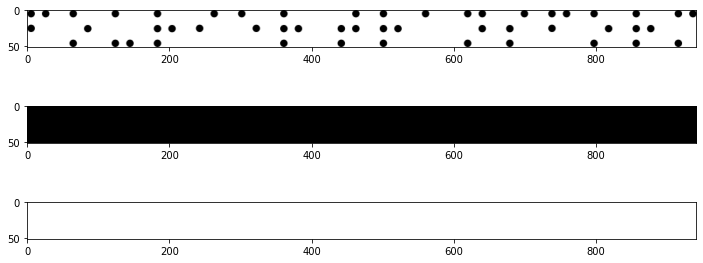

In [320]:
# img = imageio.imread('images/hello_wolrd.png')
# img = imageio.imread('images/colorized.png')
# img = imageio.imread('images/fourier_transform.png')
img = imageio.imread('images/image_processing.png')

grayImg = rgb_to_gray(img[:, :, :3])

maxContrastImg = contrastEnhancement(grayImg)

# mostrando as images original e depois de processada
f, axarr = plt.subplots(3, 1)
f.set_size_inches(12, 5)
axarr[0].imshow(img)
axarr[1].imshow(grayImg)
axarr[2].imshow(maxContrastImg)

plt.show()